# Análisis y gráficas 

## 0. Introducción
En este Jupyter Notebook se encuentran los resultados de anáilisis en base a los **Data Products** resultantes.

## 1. Cargar librerías

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Cargar datos (Data)

In [6]:
dp1 = pd.read_csv('Data/DP1_vacunados_y_fallecidos_x_semanaEpi.csv')
dp1.head()

,year,epi_week,total_fallecidos,total_dosis_1,total_dosis_2,total_dosis_3,0_17_fal,18_29_fal,30_39_fal,40_49_fal,...,LORETO_vac,MADRE DE DIOS_vac,MOQUEGUA_vac,PASCO_vac,PIURA_vac,PUNO_vac,SAN MARTIN_vac,TACNA_vac,TUMBES_vac,UCAYALI_vac
0,2020,10,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,11,3,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,12,36,0,0,0,0,2,3,6,...,0,0,0,0,0,0,0,0,0,0
3,2020,13,64,0,0,0,5,3,4,6,...,0,0,0,0,0,0,0,0,0,0
4,2020,14,226,0,0,0,3,5,13,12,...,0,0,0,0,0,0,0,0,0,0


In [7]:
dp2 = pd.read_csv('Data/DP2_TOTAL_vacunados_y_fallecidos_x_departamento.csv')
dp2.head()

,departamentos,fallecidos,dosis_1,dosis_2,dosis_3,no_habitantes,tasa_mortalidad,vac_porcentaje
0,AMAZONAS,1280,254079,214434,18043,426806,299.90,50.24
1,ANCASH,6751,907529,824080,84031,1180638,571.81,69.80
2,APURIMAC,1526,335102,281123,25093,430736,354.28,65.27
3,AREQUIPA,9747,1140676,1018102,120436,1497438,650.91,67.99
4,AYACUCHO,2157,405434,307663,15034,668213,322.80,46.04


## 3. Gráfica de TOTAL de fallecidos por COVID-19 por semana epidemiológica en Perú

Fecha de la segunda ola tomada del [Documento Técnico: Plan Nacional Actualizado de Vacunación contra la COVID-19](https://cdn.www.gob.pe/uploads/document/file/1805113/Plan%20Nacional%20Actualizado%20contra%20la%20COVID-19.pdf)

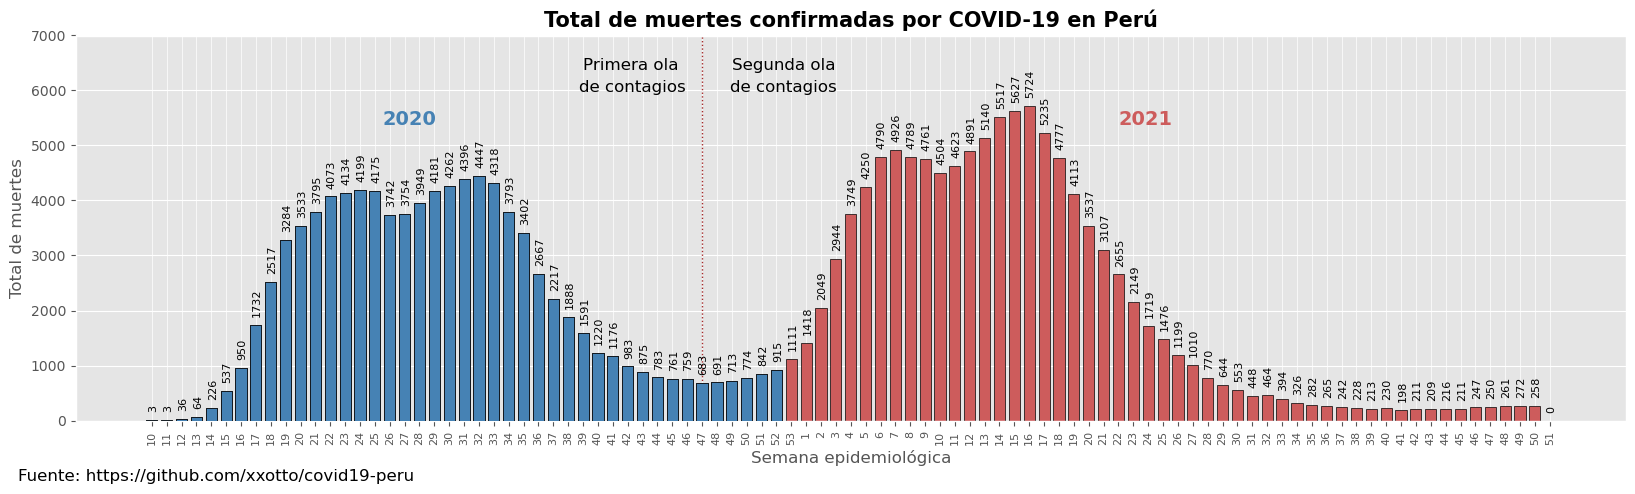

In [32]:
df1 = dp1[['year', 'epi_week', 'total_fallecidos']]

def barplot_dec(df, fal):

    plt.figure(figsize=(20, 5)) # Create a figure
    plt.style.use('ggplot') # Using the style for the plot
    
    width = 0.75 # Bar width
    x = np.arange(len(df["epi_week"]))
    a = plt.bar(x, df[fal], width, color="indianred", edgecolor="black", zorder=2)  # Create bars
    plt.bar(np.arange(0,43), df[fal].iloc[0:43], width, color="steelblue", edgecolor="black", zorder=3) 
    
    plt.xticks(x, df["epi_week"], rotation = 90)  # Create names on the x-axis
    plt.yticks(np.arange(0, 7500, 1000))  # Range on y axis

    plt.title("Total de muertes confirmadas por COVID-19 en Perú", fontsize=15, weight="bold")
    plt.xlabel("Semana epidemiológica", fontsize=12)
    plt.ylabel("Total de muertes", fontsize = 12)
    plt.tick_params(axis="x", labelsize = 8)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2 +.09, 150 + height,
                    '%d' % int(height), ha='center', va='bottom',
                    rotation = 90, fontsize=8)

    autolabel(a)

    plt.text(15.5, 5375, r"2020", fontsize=14, color = "steelblue", weight="bold")
    plt.text(65, 5375, r"2021", fontsize=14, color="indianred", weight="bold")

    plt.text(29, 6375, r"Primera ola", fontsize=12)
    plt.text(28.7, 5975, r"de contagios", fontsize=12)
    plt.text(39, 6375, r"Segunda ola", fontsize=12)
    plt.text(38.9, 5975, r"de contagios", fontsize=12)

    # In week 47 start the new wave (01/12/2020)
    plt.axvline(x=37, color="brown", linestyle=":", linewidth=1, zorder=1)  

    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-9, -1100, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)

    plt.savefig('Images/covid19-peru_fallecidos_x_semanaEpi.png', bbox_inches='tight') # Save figure
    plt.show() # Plot figure

barplot_dec(df1, 'total_fallecidos')

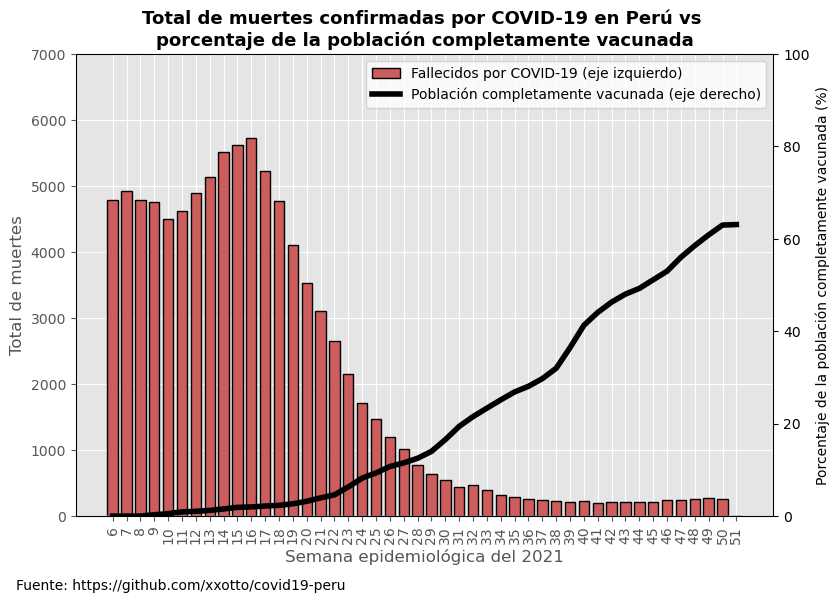

In [34]:
cumsum_vac = pd.DataFrame(round(dp1.total_dosis_2.cumsum()*100/32625948, 2))

def barplot_dec(df, fal):

    fig = plt.figure(figsize=(9, 6)) # Create a figure
    ax = fig.add_subplot(111)
    plt.style.use('default') # Using the style for the plot
    
    # Fallecidos desde que empezó la jornada de vacunación en semana epi 5 del 2021
    fal = df[fal].iloc[49:]
    
    # Primera gráfica de barras
    width = 0.75 # Bar width
    x = np.arange(len(fal))
    ax.bar(x, fal, width, color="indianred", edgecolor="black", zorder=2,
                    label='Fallecidos por COVID-19 (eje izquierdo)') 
    
    plt.xticks(x, df["epi_week"].iloc[49:], rotation = 90) 
    plt.yticks(np.arange(0, 7500, 1000))
    plt.ylabel("Total de muertes", fontsize = 12)
    plt.tick_params(axis="x", labelsize = 10)

    plt.title("Total de muertes confirmadas por COVID-19 en Perú vs \nporcentaje de la población completamente vacunada",
              fontsize=13, weight="bold")
    plt.xlabel("Semana epidemiológica del 2021", fontsize=12)

    # Segunda gráfica de frecuencia acumulada de fallecidos
    ax2 = plt.twinx()
    ax2.plot(x, cumsum_vac ['total_dosis_2'].iloc[49:], color='black', linestyle="-", linewidth=4, 
            label='Población completamente vacunada (eje derecho)')
    ax2.set_ylim(0,100,10)

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    ax2.set_ylabel('Porcentaje de la población completamente vacunada (%)')

    plt.text(-7, -16, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=10)

    plt.savefig('Images/covid19-peru_fallecidos_vs_vacunados_x_semanaEpi.png', bbox_inches='tight') # Save figure
    plt.show() # Plot figure

barplot_dec(dp1, 'total_fallecidos')




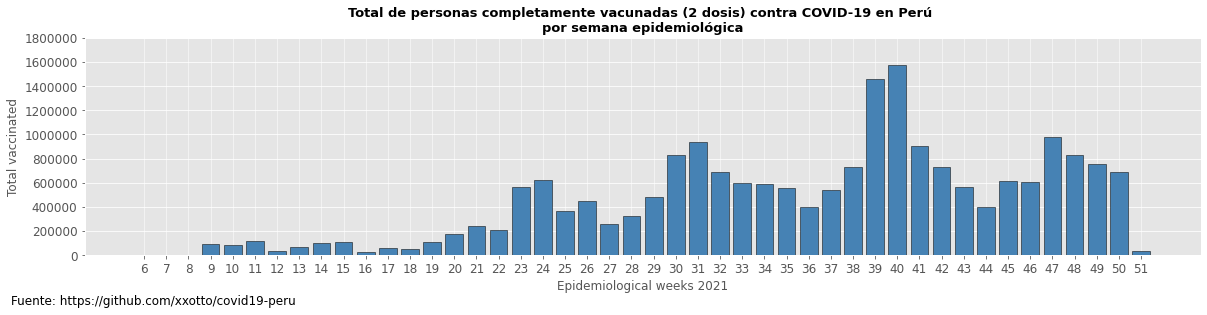

In [23]:
# Barplot of TOTAL VACCINATED
def barplot_vac(df,vac):

    # Create a figure
    plt.figure(figsize=(20, 4))

    # Using the style for the plot
    plt.style.use('ggplot')

    y_position = np.arange(len(df["epi_week"].iloc[49:]))

    plt.tick_params(axis="x", labelsize=12)
    plt.tick_params(axis="y", labelsize=12)

    plt.bar(y_position, df[vac].iloc[49:], color="steelblue", edgecolor="black")  # Create bars
    plt.xticks(y_position, df["epi_week"].iloc[49:])  # Create names on the x-axis
    plt.yticks(np.arange(0, 2000000, 200000))
    plt.ticklabel_format(axis="y", style="plain")
    
    plt.title("Total de personas completamente vacunadas (2 dosis) contra COVID-19 en Perú \npor semana epidemiológica",
              fontsize=13, weight="bold")
    plt.xlabel("Epidemiological weeks 2021")
    plt.ylabel("Total vaccinated")
    
    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-6, -410000, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)

    plt.savefig('Images/covid19-peru_vacunados_x_semanaEpi.png', bbox_inches='tight')
    plt.show()

barplot_vac(dp1, 'total_dosis_2')

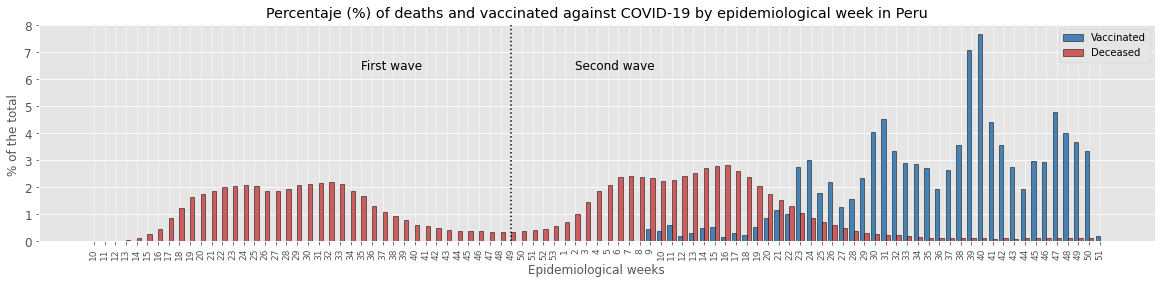

In [47]:
percents = pd.DataFrame(dp1.total_fallecidos*100/dp1.total_fallecidos.sum())
percents['total_vacunados'] = pd.DataFrame(dp1.total_dosis_2*100/dp1.total_dosis_2.sum())

def barplot_epi(df):
       
       # Create a figure
       plt.figure(figsize=(20, 4))

       # Using the style for the plot
       plt.style.use('ggplot')

       x = np.arange(len(df['epi_week']))
       width = 0.40  # the width of the bars
       
       plt.bar(x - width/2, percents['total_vacunados'], width, label='Vaccinated', color = 'steelblue', edgecolor='black')
       plt.bar(x + width/2, percents['total_fallecidos'], width, label='Deceased', color = 'indianred', edgecolor='black')
       
       # Add some text for labels, title and custom x-axis tick labels, etc.
       plt.ylabel('% of the total ')
       plt.xlabel('Epidemiological weeks')
       plt.title('Percentaje (%) of deaths and vaccinated against COVID-19 by epidemiological week in Peru')
       plt.xticks(x, df["epi_week"], rotation = 90)  # Create names on the x-axis

       plt.legend()
       plt.tick_params(axis='x', labelsize=9)
       plt.tick_params(axis='y', labelsize=12)

       plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
       plt.rcParams["axes.axisbelow"] = True
       
       # Plot line (01/12/2020 week 49, 2nd wave)
       plt.axvline(x=39, color='black', linestyle='dotted', linewidth=1.5)

       # Plot text
       plt.text(25, 6.35, r'First wave', fontsize=12)
       plt.text(45, 6.35, r'Second wave', fontsize=12)

       # Plot
       plt.savefig('Images/covid19-peru_proporcion_vacunados_fallecidos_x_semanaEpi.png', bbox_inches='tight')
       plt.show()
       

barplot_epi(dp1)

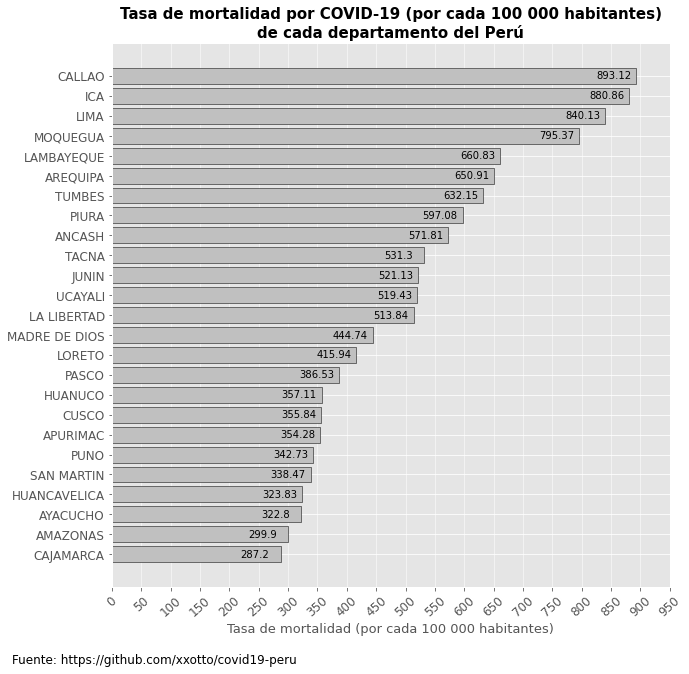

In [66]:
def barplot_dep(df):
     
    # Create a figure
    fig, ax = plt.subplots(figsize=(10,10))

    # Using the style for the plot
    plt.style.use('ggplot')

    # Create y positions
    y_pos = np.arange(len(df["departamentos"]))
    df = df.sort_values(by=["tasa_mortalidad"])

    # Create bars
    bh = plt.barh(y_pos, df["tasa_mortalidad"], color="silver", edgecolor="black")
    #plt.barh(18, df["tasa_mortalidad"].iloc[18], color="indianred", edgecolor="black")
    ax.bar_label(ax.containers[0], label_type= 'edge', padding=-40)

    # Create names on the x-axis
    plt.xticks(np.arange(0, 1000, 50),rotation = 42)
    plt.yticks(y_pos, df["departamentos"], fontsize=12)

    # Labels
    plt.title("Tasa de mortalidad por COVID-19 (por cada 100 000 habitantes)\nde cada departamento del Perú",
             fontsize=15, weight="bold")
    plt.xlabel("Tasa de mortalidad (por cada 100 000 habitantes)", fontsize=13)
    plt.tick_params(axis="x", labelsize=12)

    #plt.axvline(x=613.7630085109, color="brown", linestyle="dashed", linewidth=.75)

    # Configure grid
    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-170, -5.5, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)
    
    # Show graphic
    plt.savefig('Images/covid19-peru_fallecidos_x_departamentos.png', bbox_inches='tight')
    plt.show()

barplot_dep(dp2)

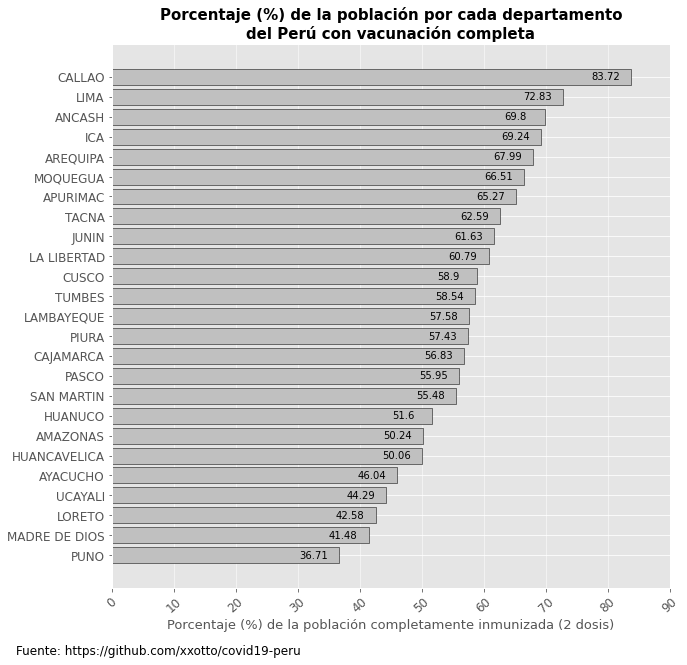

In [79]:
def barplot_dep(df):
     
    # Create a figure
    fig, ax = plt.subplots(figsize=(10,10))

    # Using the style for the plot
    plt.style.use('ggplot')

    # Create y positions
    y_pos = np.arange(len(df["departamentos"]))
    df = df.sort_values(by=["vac_porcentaje"])

    # Create bars
    bh = plt.barh(y_pos, df['vac_porcentaje'], color="silver", edgecolor="black")
    #plt.barh(18, df["tasa_mortalidad"].iloc[18], color="indianred", edgecolor="black")
    ax.bar_label(ax.containers[0], label_type= 'edge', padding=-40)

    # Create names on the x-axis
    plt.xticks(np.arange(0, 100, 10),rotation = 42)
    plt.yticks(y_pos, df["departamentos"], fontsize=12)

    # Labels
    plt.title("Porcentaje (%) de la población por cada departamento\ndel Perú con vacunación completa",
             fontsize=15, weight="bold")
    plt.xlabel("Porcentaje (%) de la población completamente inmunizada (2 dosis)", fontsize=13)
    plt.tick_params(axis="x", labelsize=12)

    #plt.axvline(x=613.7630085109, color="brown", linestyle="dashed", linewidth=.75)

    # Configure grid
    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-15.5, -5, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)
    
    # Show graphic
    plt.savefig('Images/covid19-peru_vacunados_x_departamentos.png', bbox_inches='tight')
    plt.show()

barplot_dep(dp2)

In [ ]:
# Barplot of TOTAL DECEASED
def barplot_dec(df, dep_name):

    plt.figure(figsize=(20, 5))     # Create a figure
    plt.style.use('ggplot')         # Using the style for the plot
    
    width = 0.75                        # Width of bars
    x = np.arange(len(df["epi_week"]))  # x axis positions

    # The red bar is plotted first, then blue bar is plotted above
    bar = plt.bar(x, df[dep_name], width, color="indianred", edgecolor="black", zorder=2)
    plt.bar(np.arange(0,43), df[dep_name].iloc[0:43], width, color="steelblue", 
            edgecolor="black", zorder=3)
    
    # Bar names in 'x' and 'y' axis
    plt.xticks(x, df["epi_week"], rotation = 90)  # Create names on the x-axis
    plt.tick_params(axis="x", labelsize = 8)
    """ plt.yticks(np.arange(0, dep_df[ dep_name].max() + 
               round(10/100*dep_df[dep_name].max()), 
               10/100*dep_df[ dep_name].max()))  # Create names on the y-axis """

    # Total number in each bar
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2 +.09, 2 + height,
                    '%d' % int(height), ha='center', va='bottom',
                    rotation = 90, fontsize=8)

    # Title and labels
    plt.title("Total confirmed deaths from COVID-19 in " + str(dep_name), fontsize=15, weight="bold")
    plt.xlabel("Epidemiological week", fontsize=12)
    plt.ylabel("Total deaths", fontsize = 12)
    """
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2 +.09, 1.5 + height,
                    '%d' % int(height), ha='center', va='bottom',
                    rotation = 90, fontsize=8)
        print(height)
    autolabel(bar)"""
    
    
    # In week 49 start the new wave (01/12/2020)
    plt.axvline(x=39, color="brown", linestyle=":", linewidth=.75, zorder=1) 
    """
    plt.text(15.5, 5375, r"2020", fontsize=14, color = "steelblue", weight="bold")
    plt.text(65, 5375, r"2021", fontsize=14, color="indianred", weight="bold")

    plt.text(31.5, 6375, r"First wave", fontsize=12)
    plt.text(41, 6375, r"Second wave", fontsize=12)
    """
    """ ax2 = plt.twinx()
    ax2.plot(x, vac_fal_semEpi['deceased_cum'], color='black', linestyle="-", linewidth=.75)
    ax2.set_ylim(0,210000,15000)
    ax2.set_ylabel('Cumulative confirmed COVID-19 deaths') """

    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-7, -8, r"Source: https://github.com/xxotto/covid19-peru", fontsize=12)

    plt.show()

barplot_dec(fal_dep_semEpi, "AMAZONAS")


In [ ]:
# Barplot of TOTAL VACCINATED
def barplot_vac(df):

    # Create a figure
    plt.figure(figsize=(20, 4))

    # Using the style for the plot
    plt.style.use('ggplot')

    y_position = np.arange(len(df['edad_cat']))

    plt.tick_params(axis="x", labelsize=12)
    plt.tick_params(axis="y", labelsize=12)

    plt.bar(y_position, df["fallecidos"], color="steelblue", edgecolor="black")  # Create bars
    plt.xticks(y_position, df["edad_cat"])  # Create names on the x-axis
    
    plt.yticks(np.arange(0, 5000, 50000))
    plt.ticklabel_format(axis="y", style="plain")
    
    plt.title("Coronavirus vaccines in Peru")  # Labels
    plt.xlabel("Epidemiological weeks 2021")
    plt.ylabel("Total vaccinated")

    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    #plt.text(-5, -500000, r"Source: https://github.com/xxotto/covid19-peru", fontsize=12)

    plt.savefig('Images/covid19-peru_vacunados_x_semanaEpi.png', bbox_inches='tight')
    plt.show()

barplot_vac(fal)